In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')


In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


In [3]:
model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:])) # which is (100,100,3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=1)

In [6]:
checkpoint=ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
28/28 [==============================] - ETA: 0s - loss: 0.7122 - accuracy: 0.5568WARNING:tensorflow:From D:\ANACONDA\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
28/28 [==============================] - 54s 2s/step - loss: 0.7122 - accuracy: 0.5568 - val_loss: 0.6289 - val_accuracy: 0.6818
Epoch 2/20
28/28 [==============================] - 64s 2s/step - loss: 0.5813 - accuracy: 0.7091 - val_loss: 0.4725 - val_accuracy: 0.8500
Epoch 3/20
28/28 [==============================] - 57s 2s/step - loss: 0.3857 - accuracy: 0.8511 - val_loss: 0.3503 

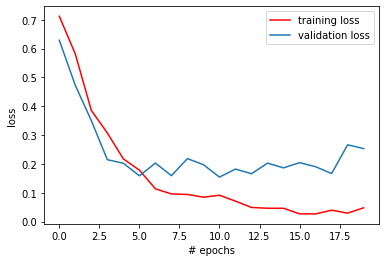

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

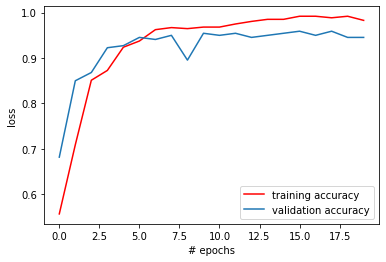

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

NameError: name 'test_data' is not defined

 - if checkpoint is used here no need to save model separately we can load specific best model manually 
 -  if not model has to be saved with model.save('model.h5') syntax